<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/11-Practica-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Práctica *final* de clasificación

Vamos a retomar el dataset de la sesión pasada (dataset PIMA). El objetivo es tener el mejor modelo posible con cada uno de los siguientes algoritmos:

* SVM
* Decision Tree
* Random Forest
* Regresión Logística

Con esto haremos una comparación entre ellos.

Los pasos a seguir son:

1. Prepara el dataset para los algoritmo, recuerda que hay algunos valores faltantes. Además, recuerda reescalar los datos apropiadamente.

2. Usando como dataset el dataset preprocesado del paso anterior, realiza una busqueda de parámetros con cada algoritmo de acuerdo a las siguientes opciones:

* SVM
  - C: 0.1,1,10,100
  - kernel: lineal, polinomial, rbf
  - grados (polinomial): 2,3,5
* Decision Tree
  - criterion: gini, entropy, log_loss
  - max_depth: None, 10, 20,
  - min_samples_split: 2, 3, 5
* Random Forest
  - criterion: gini, entropy, log_loss
  - max_depth: None, 10, 20,
  - min_samples_split: 2, 3, 5
* Regresión Logística
  - C: 0.1,1,10
  - penalty: l1, l2, elasticnet, None

3. Considerando los 4 mejores modelos anteriores. ¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto toma en cuenta el accuracy en el conjunto de prueba.

1. Revisamos el data set y lo imputamos

In [90]:
#importamos el data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [91]:
#BUSCAMOS VALORES FALTANTES en todas las columnas
cols_imput=[]
for i in ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age']:
    if 0 in list(df[i].unique()): #en este caso los 0's son datos faltantes
        cols_imput.append(i)
    else:
        pass

#cambiamos 0's por NaNs y luego imputamos
df[cols_imput] = df[cols_imput].replace(0, np.nan)
df_imputed =df.fillna(df.mean())

##SEPARAMOS VARIABLES DE SALIDA
y = df_imputed['label'].values
df_imputed.drop(columns='label',inplace=True)

print(df_imputed.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
dtype: int64


2. Observamos los rangos de datos de las variables

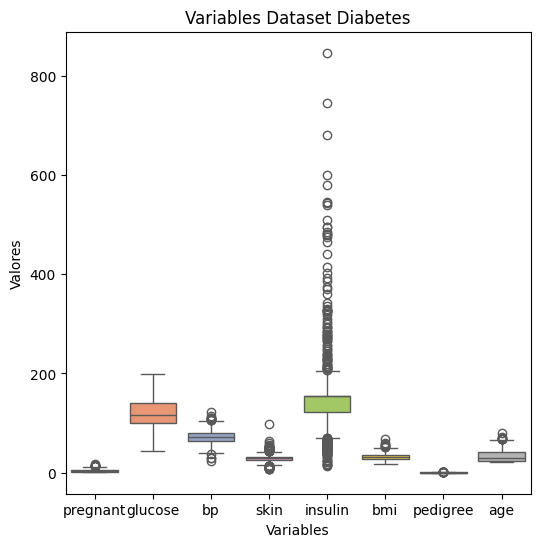

In [92]:
#verificamos los rangos de cada variable
plt.figure(figsize=(6, 6))  # Tamaño de la figura
sns.boxplot(data=df_imputed, palette="Set2")  # Utiliza Seaborn para crear el boxplot
plt.title('Variables Dataset Diabetes')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

3. la escala de los valores es muy distinta, por lo que procedemos a su reescalamiento 

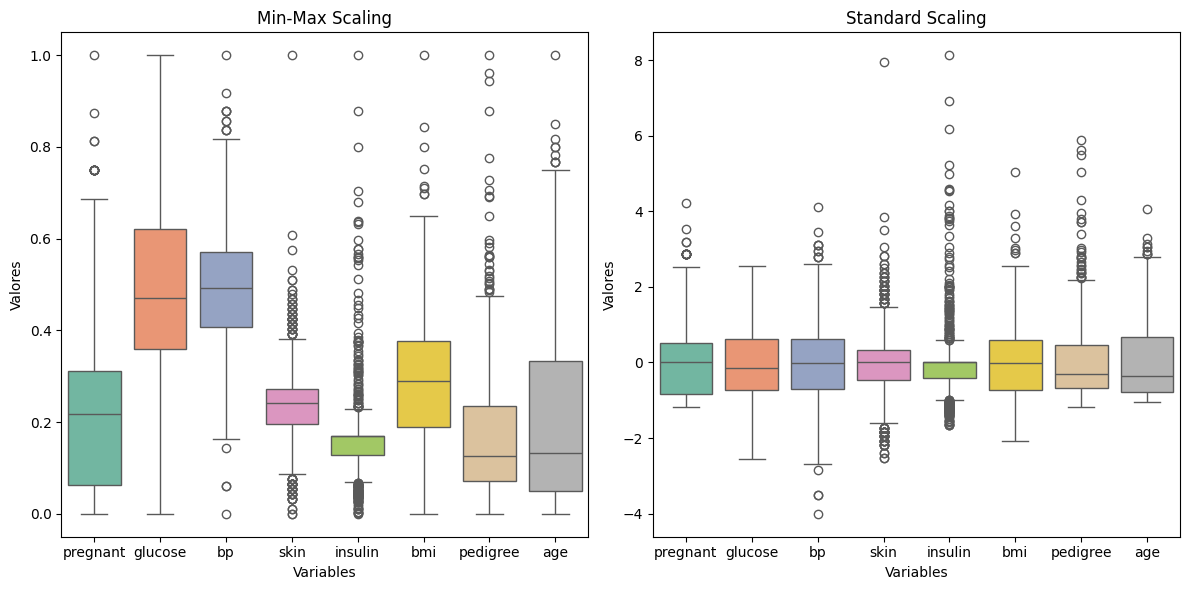

In [93]:
# procedemos a reescalar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)


#graficamos ambos para ver con cual nos quedamos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para Min-Max Scaling
sns.boxplot(data=df_normalized, palette="Set2", ax=axes[0])
axes[0].set_title('Min-Max Scaling')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Valores')

# Boxplot para Standard Scaling
sns.boxplot(data=df_standardized, palette="Set2", ax=axes[1])
axes[1].set_title('Standard Scaling')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Valores')

# Ajustar los gráficos
plt.tight_layout()
plt.show()

4.  Probamos con los datos estandarizados

In [94]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#DEFINIMOS MATRIZ DE FEATURES
X = df_standardized.values

#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)
print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((614, 8), (614,))
Prueba: ((154, 8), (154,))


## Regresión Logística

Primero probamos con una regresión logística estandar para observar el desempeño

  - C: 0.1,1,10
  - penalty: l1, l2, elasticnet, None


Test score: 0.7337662337662337


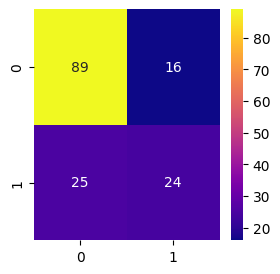

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# for C in [0.1,1,10]:
#     for penalty in ['l1', 'l2', 'elasticnet']:
clf = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')#solver='newton-cholesky')# C=0.1,penalty='l1'
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Test score: {clf.score(X_test,y_test)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Probamos si el modelo mejora con **polinomial features**

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#probamos con varios grados del polinomio
for i in range(2,6):
    pl = Pipeline([('pf',PolynomialFeatures(i,include_bias=False)),
                ('clf',LogisticRegression(C=0.1,penalty='l1',solver='liblinear'))])
    
    pl.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = pl.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{i} Test score: {accuracy * 100:.2f}%')

2 Test score: 77.92%
3 Test score: 78.57%
4 Test score: 76.62%
5 Test score: 74.03%


Test score: 78.57%


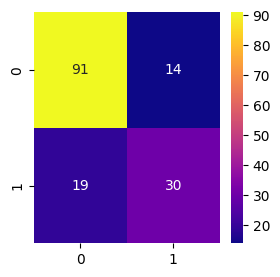

In [98]:
#el grado 3 es el que funciona mejor
pl = Pipeline([('pf',PolynomialFeatures(3,include_bias=False)),
            ('clf',LogisticRegression(C=0.1,penalty='l1',solver='liblinear'))])
pl.fit(X_train, y_train)

# Hacer predicciones
y_pred = pl.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Test score: {accuracy * 100:.2f}%')

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

El modelo mejora con polinomial features donde observamos un accuracy del 78%

## SVM
  - C: 0.1,1,10,100
  - kernel: linear, poly, rbf
  - grados (polinomial): 2,3,5

In [99]:
from sklearn.svm import SVC

for C in [0.1,1,10,100]:
    # Crear un pipeline que incluye el escalado de características y el clasificador SVM
    pipeline = Pipeline([ # Escalador de características
        ('svm', SVC(kernel='rbf', C=C, gamma='auto'))  # Clasificador SVM con kernel RBF  degree= [2, 3, 4],  gamma=[scale, auto] kernel=[linear, poly, rbf]
    ])

    # Entrenar el pipeline con los datos de entrenamiento
    pipeline.fit(X_train, y_train)

    # Realizar predicciones en los datos de prueba
    y_pred = pipeline.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'C:{C} Test score: {accuracy * 100:.2f}%')

C:0.1 Test score: 74.03%
C:1 Test score: 76.62%
C:10 Test score: 74.68%
C:100 Test score: 69.48%


C:100 Test score: 76.62%


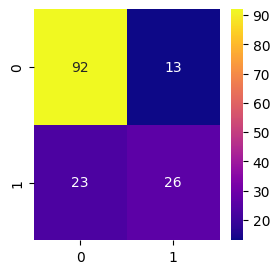

In [100]:
#el que funciona mejor es con el kernel rbf y C=1
pipeline = Pipeline([ # Escalador de características
    ('svm', SVC(kernel='rbf', C=1, gamma='auto'))  # Clasificador SVM con kernel RBF  degree= [2, 3, 4],  gamma=[scale, auto] kernel=[linear, poly, rbf]
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'C:{C} Test score: {accuracy * 100:.2f}%')


plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

## Decision Tree
  - criterion: gini, entropy, log_loss
  - max_depth: None, 10, 20,
  - min_samples_split: 2, 3, 5

Primero probamos los distintos criterios

Test score: 70.13%


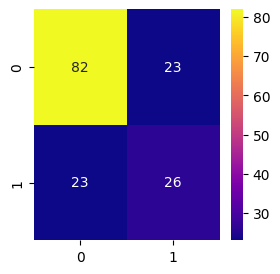

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix


#Probamos el clasificador solo
pipeline = Pipeline([('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test score: {accuracy * 100:.2f}%')

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Ahora probaremos distintas combinaciones con grid serach para ver quel tiene mejor desempeño

In [106]:
from sklearn.model_selection import GridSearchCV

pl = Pipeline([('clasificador', DecisionTreeClassifier())])

param_grid = {
    "clasificador__criterion": ['gini','entropy', 'log_loss'],
    "clasificador__max_depth": [None,10, 20],
    "clasificador__min_samples_split": [2, 3, 5]
}

search = GridSearchCV(pl, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_clf = search.best_estimator_
print(f"Accuracy en la prueba: {best_clf.score(X_test,y_test)}")

Best parameter (CV score=0.718):
{'clasificador__criterion': 'entropy', 'clasificador__max_depth': 10, 'clasificador__min_samples_split': 3}
Accuracy en la prueba: 0.6948051948051948


El accuracy del modelo no sobrepasa el 70% para random forest.

## Random Forest
  - criterion: gini, entropy, log_loss
  - max_depth: None, 10, 20,
  - min_samples_split: 2, 3, 5

Test score: 72.08%


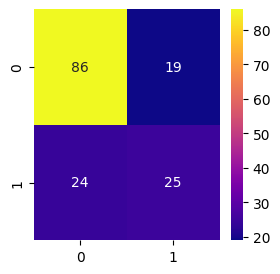

In [111]:
from sklearn.ensemble import RandomForestClassifier

#Probamos el clasificador solo
pipeline = Pipeline([('clf', RandomForestClassifier(n_jobs=-1))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test score: {accuracy * 100:.2f}%')

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV

pl = Pipeline([('clasificador', RandomForestClassifier())])

param_grid = {
    "clasificador__criterion": ['gini','entropy', 'log_loss'],
    "clasificador__max_depth": [None,10, 20],
    "clasificador__min_samples_split": [2, 3, 5]
}

search = GridSearchCV(pl, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_clf = search.best_estimator_
print(f"Accuracy en la prueba: {best_clf.score(X_test,y_test)}")

Best parameter (CV score=0.777):
{'clasificador__criterion': 'gini', 'clasificador__max_depth': None, 'clasificador__min_samples_split': 3}
Accuracy en la prueba: 0.7337662337662337


#### COMENTARIOS

- Por lo resultados del accuracy obtenidos, el mejor clasificador fue la regresión logistica con polinomial features, donde el polinomio de grado=3, con un penalty='l1' y un solver='liblinear', obtuvo el mejor desempeño